In [44]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

import torch.nn as nn

# Create dataset

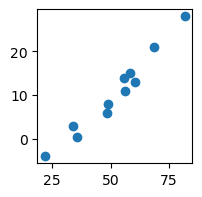

In [45]:
# Dataset for linear regression, y=wx+b
# Targets (y)
# .unsqueeze turns the 1D vector into a 2D single column tensor
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]).unsqueeze(1)
# Inputs (x)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]).unsqueeze(1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2, 2)) # Width 2 inches, height 2 inches
ax.scatter(t_u, t_c)

# Rescaling the input for better gradient computation
# Some optimizers are more sensitive to the scale of the data, e.g. the stochastic gradient descent
t_un = 0.1 * t_u

In [46]:
# Splitting the dataset
n_samples = t_u.shape[0]
print("Number of samples", n_samples)
n_val = int(0.2 * n_samples)
print("Validation set size", n_val)
# Shuffling the indices of the dataset. The result is a tensor
shuffled_indices = torch.randperm(n_samples)
# Indices of training and validating sets
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

# Training set
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
# Validation set
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

# Rescaled training set
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

Number of samples 11
Validation set size 2


In [47]:
# Create a linear model
# bias=True: there is a bias for this model. In fact, this is the default setting and we don't need it
# Just explicitly show it here.
linear_model = nn.Linear(in_features=1, out_features=1, bias=True)
# Show its weight and bias
print("Weight", linear_model.weight)
print("Bias", linear_model.bias)
# Show the parameters in another way
print(list(linear_model.parameters()))
# Apply the model to the validation set
print("Output of the validation set:\n", linear_model(train_t_un) )

Weight Parameter containing:
tensor([[-0.0372]], requires_grad=True)
Bias Parameter containing:
tensor([-0.2327], requires_grad=True)
[Parameter containing:
tensor([[-0.0372]], requires_grad=True), Parameter containing:
tensor([-0.2327], requires_grad=True)]
Output of the validation set:
 tensor([[-0.4421],
        [-0.4492],
        [-0.4146],
        [-0.4574],
        [-0.4406],
        [-0.4871],
        [-0.5373],
        [-0.3655],
        [-0.3588]], grad_fn=<AddmmBackward0>)


In [48]:
# Training loop
def training_loop(n_epochs, optimizer, model, loss_fn, 
                  train_t_u, val_t_u, train_t_c, val_t_c):
    
    for epoch in range(1, n_epochs + 1):
        # Forward propagation (computing the loss)
        train_loss = loss_fn(model(train_t_u), train_t_c)
        val_loss = loss_fn(model(val_t_u), val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Validation loss {val_loss.item():.4f}")



# Number of epochs
n_epochs=3000
# Create an optimizer
# Note that the first argument of optim.SGD must be an iterable
# linear_model.parameters() creates a generator of the parameters
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

# Use pytorch's mean square loss 
# loss_fn=nn.MSELoss() creates an object. We can use it as loss_fn(Predictions, Targets),
# just the same as our manually defined loss in the last chapter
loss_fn=nn.MSELoss()
training_loop(n_epochs, optimizer, linear_model, loss_fn, 
              train_t_un, val_t_un, train_t_c, val_t_c)
print("Updated weight and bias", linear_model.weight, linear_model.bias)

Epoch 1, Training loss 235.3488, Validation loss 27.3556
Epoch 2, Training loss 45.4951, Validation loss 30.7185
Epoch 3, Training loss 25.4055, Validation loss 50.0340
Epoch 500, Training loss 8.7657, Validation loss 19.3469
Epoch 1000, Training loss 4.3531, Validation loss 7.7529
Epoch 1500, Training loss 3.0029, Validation loss 5.1903
Epoch 2000, Training loss 2.5898, Validation loss 4.9511
Epoch 2500, Training loss 2.4634, Validation loss 5.1793
Epoch 3000, Training loss 2.4247, Validation loss 5.4158
Updated weight and bias Parameter containing:
tensor([[5.4729]], requires_grad=True) Parameter containing:
tensor([-17.7385], requires_grad=True)
